## Before you start!

###Please make sure to have a directory called 'params' containing the parameters as shown in the picture:

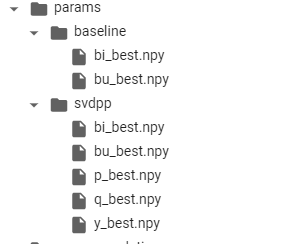

###Also load the source code like:
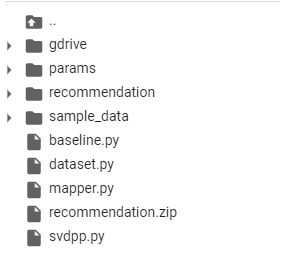

### Otherwise you'll have to change arguments of the function 'get_saved_params' later on!


In [1]:
!gdown --id 1Ted1erR6zUHLk4SiE8pOu4h8ef3x7OP7

Downloading...
From: https://drive.google.com/uc?id=1Ted1erR6zUHLk4SiE8pOu4h8ef3x7OP7
To: /content/recommendation.zip
803MB [00:09, 85.0MB/s]


In [2]:
!unzip ./recommendation.zip

Archive:  ./recommendation.zip
   creating: recommendation/
  inflating: recommendation/asset_genres.csv  
  inflating: recommendation/assets.csv  
  inflating: recommendation/bookmarks.csv  
  inflating: recommendation/bookmarks_idx_test.npy  
  inflating: recommendation/bookmarks_idx_train.npy  
  inflating: recommendation/favorites.csv  
  inflating: recommendation/genres.csv  
  inflating: recommendation/ratings.csv  


In [9]:
import pandas as pd
import numpy as np

In [10]:
from baseline import Baseline
from mapper import Mapper 
from svdpp import SVDPP
from dataset import interest_generator,split_dataset

In [11]:
df_favorites=pd.read_csv('./recommendation/favorites.csv')
df_bookmarks=pd.read_csv('./recommendation/bookmarks.csv')
df_ratings=pd.read_csv('./recommendation/ratings.csv')

In [12]:
df_interest=interest_generator(df_favorites,df_bookmarks,df_ratings)

In [13]:
train_interest,test_interest=split_dataset(df_interest)

###The RMSE IS 0.68 on one million test samples. (SVDD)

In [15]:
s=SVDPP()

s.get_saved_params(iteration='best',base_path='/content/params/svdpp/')

df_test=test_interest[:1000000]
test_mapper=Mapper(df_test)
mu = df_test['interest'].sum()/df_test.shape[0]
s.get_rmse(df_test,mu=mu,mapper=test_mapper)

Batch: 0.00 Took: 0.01
Batch: 1.00 Took: 31.50
Batch: 2.00 Took: 31.10
Batch: 3.00 Took: 31.12
Batch: 4.00 Took: 31.28
Batch: 5.00 Took: 31.70
Batch: 6.00 Took: 31.37
Batch: 7.00 Took: 31.47
Batch: 8.00 Took: 31.41
Batch: 9.00 Took: 31.36


0.6840391746478319

###The RMSE IS 0.27 on the whole test dataset. (BASELINE)

In [17]:
baseline=Baseline()

baseline.get_saved_params(iteration='best',base_path='/content/params/baseline/')

m_test=Mapper(test_interest)
m_train=Mapper(train_interest)

d_profile = {x:m_train.profile_dict[x] for x in m_train.profile_dict if x in m_test.profile_dict}
d_asset = {x:m_train.asset_dict[x] for x in m_train.asset_dict if x in m_test.asset_dict}

m_test.profile_dict=d_profile
m_test.asset_dict=d_asset

mu = train_interest['interest'].sum()/train_interest.shape[0]

baseline.get_rmse(test_interest,m_test,mu)

 Treated 0.00 Millions
 Treated 1.00 Millions
 Treated 2.00 Millions
 Treated 3.00 Millions
 Treated 4.00 Millions
 Treated 5.00 Millions
 Treated 6.00 Millions
 Treated 7.00 Millions
 Treated 8.00 Millions
 Treated 9.00 Millions
 Treated 10.00 Millions
 Treated 11.00 Millions
 Treated 12.00 Millions
 Treated 13.00 Millions
 Treated 14.00 Millions
 Treated 15.00 Millions
 Treated 15.00 Millions
 Treated 16.00 Millions
 Treated 17.00 Millions
 Treated 18.00 Millions
 Treated 19.00 Millions
 Treated 20.00 Millions
 Treated 21.00 Millions


0.2752960568724151